In [1]:
import csv
import pickle

In [48]:
# Import tel name counts
folder = "G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada"
telname_count = {}
for s in range(13):
    fn = folder + "/Telnames"+ str(s+1) + ".csv"
    with open(fn, "r", encoding="utf8") as f:
        csvr = csv.DictReader(f, delimiter=",")
        print(fn)
        i = 0
        for line in csvr:
            name = line["氏名"]
            telname_count[name] = int(line["件数"])
            i += 1
            #if i > 10:
            #    break

G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames1.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames2.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames3.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames4.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames5.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames6.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames7.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames8.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames9.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames10.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames11.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames12.csv
G:/Sync_N/NISTEP/16_IPD/11_Data/Rarenames/tsukada/Telnames13.csv


In [49]:
with open("telname_count.pickle", 'wb') as f:
    pickle.dump(telname_count, f)

In [73]:
with open("telname_count.pickle", 'rb') as f:
    telname_count = pickle.load(f)

In [74]:
len(telname_count)

13182934

In [75]:
i = 0
n = 0
for k, v in telname_count.items():
    i += 1
    n += v
    if i <= 10:
        print(k, v)

田中　実 2620
鈴木　茂 2470
鈴木　実 2301
佐藤　清 2272
高橋　清 2248
佐藤　正 2231
佐藤　進 2178
鈴木　清 2164
田中　稔 2071
鈴木　博 2039


In [40]:
# 同姓同名の人数ごとに名前の数の分布
telname_count_dist = {}
for k, v in telname_count.items():
    if v not in telname_count_dist:
        telname_count_dist[v] = 1
    else:
        telname_count_dist[v] += 1

In [41]:
len(telname_count_dist)

913

In [42]:
telname_count_dist

{'1': 9861442,
 '10': 39505,
 '100': 202,
 '1005': 1,
 '1006': 3,
 '1008': 1,
 '101': 211,
 '1012': 2,
 '1013': 1,
 '1016': 1,
 '102': 226,
 '1020': 2,
 '1023': 2,
 '1024': 2,
 '1025': 1,
 '1027': 1,
 '1028': 1,
 '1029': 1,
 '103': 187,
 '1035': 1,
 '1036': 1,
 '104': 187,
 '1046': 1,
 '1049': 1,
 '105': 185,
 '1052': 1,
 '1053': 1,
 '1055': 1,
 '1059': 1,
 '106': 178,
 '1067': 1,
 '107': 168,
 '1072': 1,
 '1074': 1,
 '108': 158,
 '1086': 1,
 '1087': 1,
 '109': 176,
 '1099': 1,
 '11': 31749,
 '110': 187,
 '1102': 1,
 '111': 167,
 '1116': 1,
 '1118': 1,
 '112': 161,
 '1122': 1,
 '1123': 2,
 '1124': 3,
 '1127': 1,
 '1128': 1,
 '113': 135,
 '1137': 1,
 '1138': 1,
 '114': 148,
 '115': 145,
 '116': 157,
 '1162': 1,
 '1165': 1,
 '1167': 2,
 '117': 168,
 '1173': 1,
 '1174': 2,
 '1176': 1,
 '118': 124,
 '1180': 1,
 '1187': 1,
 '119': 138,
 '1195': 1,
 '12': 26145,
 '120': 121,
 '1208': 1,
 '1209': 1,
 '121': 131,
 '1212': 1,
 '1213': 1,
 '122': 136,
 '123': 116,
 '1232': 1,
 '1233': 1,
 '1235'

In [91]:
# 特許発明者の名前のブロック数
n_blocks_all = 1675133
n_blocks_all

1675133

In [71]:
# 特許発明者の名前のブロック数
n_blocks = 1154987
n_blocks

1154987

In [88]:
import random
import copy

In [76]:
random.choices(list(telname_count.keys()), k=3, weights=list(telname_count.values()))

['池田\u3000勝', '鈴木\u3000輝之', ' 真栄田\u3000道弘']

In [78]:
namelist = list(telname_count.keys())
countlist = list(telname_count.values())

In [96]:
# 特許発明者の名前のブロック数になるまで電話帳の名前を同姓同名の人数に比例してランダムに抽出してrnamesに抽出された数を保存する
random.seed(123456789)
stepsize = 1000000
alpha = 0.1
rnames = {}
n = 0
i = 0
nall = 0
while n < n_blocks_all and stepsize >= 1:
    i += 1
    n = len(rnames)
    rnames0 = copy.deepcopy(rnames)
    cand = random.choices(namelist, k=int(stepsize), weights=countlist)
    for v in cand:
        if v not in rnames:
            rnames[v] = 1
        else:
            rnames[v] += 1
    if len(rnames) > n_blocks_all:
        print(len(rnames))
        rnames = rnames0
        stepsize = stepsize * alpha
    else:
        nall += len(cand)
    rnames0 = {}
    n = len(rnames)
    print(i, stepsize, n, nall)

1 1000000 800213 1000000
2 1000000 1454251 2000000
1454251
3 100000.0 1454251 2000000
4 100000.0 1515084 2100000
5 100000.0 1575000 2200000
6 100000.0 1634496 2300000
1634496
7 10000.0 1634496 2300000
8 10000.0 1640446 2310000
9 10000.0 1646364 2320000
10 10000.0 1652283 2330000
11 10000.0 1658089 2340000
12 10000.0 1663977 2350000
13 10000.0 1669838 2360000
1669838
14 1000.0 1669838 2360000
15 1000.0 1670412 2361000
16 1000.0 1671006 2362000
17 1000.0 1671596 2363000
18 1000.0 1672143 2364000
19 1000.0 1672747 2365000
20 1000.0 1673317 2366000
21 1000.0 1673955 2367000
22 1000.0 1674531 2368000
23 1000.0 1675103 2369000
1675103
24 100.0 1675103 2369000
1675103
25 10.0 1675103 2369000
26 10.0 1675109 2369010
27 10.0 1675116 2369020
28 10.0 1675122 2369030
29 10.0 1675126 2369040
30 10.0 1675132 2369050
1675132
31 1.0 1675132 2369050
32 1.0 1675132 2369051
33 1.0 1675132 2369052
34 1.0 1675133 2369053


In [95]:
print(len(rnames))
print(n_blocks_all)

1675133
1675133


In [101]:
# ランダム抽出された名前から同姓同名の人数の分布を計算
sum_rnames = {}
for k, v in rnames.items():
    if v not in sum_rnames:
        sum_rnames[v] = 1
    else:
        sum_rnames[v] += 1

In [102]:
sum_rnames

{1: 1389262,
 2: 177246,
 3: 47297,
 4: 20930,
 5: 11464,
 6: 6932,
 7: 4681,
 8: 3270,
 9: 2452,
 10: 1899,
 11: 1487,
 12: 1128,
 13: 938,
 14: 728,
 15: 659,
 16: 536,
 17: 431,
 18: 354,
 19: 306,
 20: 276,
 21: 238,
 22: 225,
 23: 209,
 24: 157,
 25: 168,
 26: 148,
 27: 118,
 28: 97,
 29: 111,
 30: 74,
 31: 91,
 32: 65,
 33: 69,
 34: 70,
 35: 69,
 36: 53,
 37: 39,
 38: 56,
 39: 52,
 40: 46,
 41: 29,
 42: 39,
 43: 41,
 44: 36,
 45: 18,
 46: 19,
 47: 25,
 48: 16,
 49: 17,
 50: 18,
 51: 19,
 52: 19,
 53: 13,
 54: 17,
 55: 19,
 56: 14,
 57: 13,
 58: 17,
 59: 10,
 60: 8,
 61: 10,
 62: 12,
 63: 11,
 64: 10,
 65: 10,
 66: 6,
 67: 7,
 68: 7,
 69: 7,
 70: 4,
 71: 7,
 72: 6,
 73: 9,
 74: 9,
 75: 8,
 76: 8,
 77: 10,
 78: 8,
 79: 3,
 80: 5,
 81: 4,
 82: 6,
 83: 6,
 84: 3,
 85: 3,
 86: 8,
 87: 4,
 88: 5,
 89: 5,
 90: 3,
 91: 4,
 92: 2,
 93: 4,
 94: 1,
 95: 1,
 96: 4,
 97: 2,
 98: 1,
 99: 5,
 100: 2,
 101: 1,
 104: 3,
 105: 2,
 106: 2,
 107: 2,
 108: 1,
 109: 3,
 110: 4,
 111: 2,
 112: 2,
 114:

In [106]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array(list(sum_rnames.keys()))

In [107]:
x

array([  1,   3,   4,  48,  27,   2,  15,  16,  39,   5,  11,   6,  12,
        10,  22,  49,  24,  88,   7,  46, 117, 208,  18,   9,  17,  43,
        55,  29,  19,  68,  35,  20,  44,  21, 138,  47,  61,  33, 111,
         8,  37,  85,  13, 100,  23,  82,  28,  62,  26, 115,  14, 101,
        51,  76, 150,  34,  25, 141,  42,  30,  52, 107,  32,  97,  63,
        36,  38,  56,  65, 197,  87,  79, 136,  31,  50, 133,  64,  74,
        99,  73,  71,  60,  66,  69, 105,  86, 112,  70,  72,  41,  78,
        53,  75,  45, 155, 124, 108,  57,  40, 129,  89,  58,  59,  83,
       119,  77, 104, 214,  93,  92, 131, 163,  80, 106, 183,  67, 109,
       174,  91, 171,  84,  81, 149, 114, 116, 120, 157, 200, 166, 164,
       130, 167,  90, 110,  98, 162, 156, 137,  54,  95,  96, 127,  94])

In [108]:
y = np.array(list(sum_rnames.values()))
y

array([1389262,   47297,   20930,      16,     118,  177246,     659,
           536,      52,   11464,    1487,    6932,    1128,    1899,
           225,      17,     157,       5,    4681,      19,       1,
             1,     354,    2452,     431,      41,      19,     111,
           306,       7,      69,     276,      36,     238,       1,
            25,      10,      69,       2,    3270,      39,       3,
           938,       2,     209,       6,      97,      12,     148,
             1,     728,       1,      19,       8,       2,      70,
           168,       2,      39,      74,      19,       2,      65,
             2,      11,      53,      56,      14,      10,       1,
             4,       3,       1,      91,      18,       3,      10,
             9,       5,       9,       7,       8,       6,       7,
             2,       8,       2,       4,       6,      29,       8,
            13,       8,      18,       1,       2,       1,      13,
            46,     

In [112]:
np.argsort(x)

array([  0,   5,   1,   2,   9,  11,  18,  39,  23,  13,  10,  12,  42,
        50,   6,   7,  24,  22,  28,  31,  33,  14,  44,  16,  56,  48,
         4,  46,  27,  59,  73,  62,  37,  55,  30,  65,  40,  66,   8,
        98,  89,  58,  25,  32,  93,  19,  35,   3,  15,  74,  52,  60,
        91, 138,  26,  67,  97, 101, 102,  81,  36,  47,  64,  76,  68,
        82, 115,  29,  83,  87,  80,  88,  79,  77,  92,  53, 105,  90,
        71, 112, 121,  45, 103, 120,  41,  85,  70,  17, 100, 132, 118,
       109, 108, 142, 139, 140,  63, 134,  78,  43,  51, 106,  84, 113,
        61,  96, 116, 133,  38,  86, 123,  49, 124,  20, 104, 125,  95,
       141,  99, 130, 110,  75,  72, 137,  34,  57, 122,  54,  94, 136,
       126, 135, 111, 129, 128, 131, 119, 117, 114,  69, 127,  21, 107], dtype=int64)

In [122]:
z = np.argsort(x)
x = x[z]
y = y[z]
print(x)
print(y)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 104 105 106 107 108 109 110
 111 112 114 115 116 117 119 120 124 127 129 130 131 133 136 137 138 141
 149 150 155 156 157 162 163 164 166 167 171 174 183 197 200 208 214]
[1389262  177246   47297   20930   11464    6932    4681    3270    2452
    1899    1487    1128     938     728     659     536     431     354
     306     276     238     225     209     157     168     148     118
      97     111      74      91      65      69      70      69      53
      39      56      52      46      29      39      41      36      18
      19      25      16      17      18      19      

In [123]:
yp = y/np.sum(y)

In [124]:
yp

array([  8.29344297e-01,   1.05810106e-01,   2.82347730e-02,
         1.24945303e-02,   6.84363570e-03,   4.13817888e-03,
         2.79440498e-03,   1.95208380e-03,   1.46376437e-03,
         1.13364133e-03,   8.87690709e-04,   6.73379367e-04,
         5.59955538e-04,   4.34592358e-04,   3.93401599e-04,
         3.19974593e-04,   2.57293003e-04,   2.11326504e-04,
         1.82672062e-04,   1.64763037e-04,   1.42078271e-04,
         1.34317693e-04,   1.24766213e-04,   9.37239013e-05,
         1.00290544e-04,   8.83511936e-05,   7.04421679e-05,
         5.79058499e-05,   6.62633952e-05,   4.41755968e-05,
         5.43240447e-05,   3.88028891e-05,   4.11907592e-05,
         4.17877267e-05,   4.11907592e-05,   3.16392788e-05,
         2.32817335e-05,   3.34301814e-05,   3.10423113e-05,
         2.74605061e-05,   1.73120582e-05,   2.32817335e-05,
         2.44756685e-05,   2.14908309e-05,   1.07454154e-05,
         1.13423830e-05,   1.49241881e-05,   9.55148039e-06,
         1.01484479e-05,

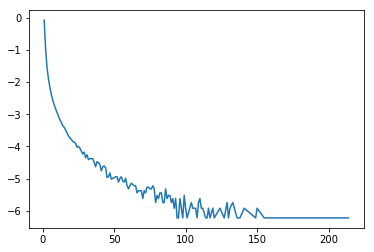

In [125]:
# ランダム抽出された名前から同姓同名の人数の度数分布（対数スケール）
import math
plt.figure(0)
plt.plot(x, np.log10(y))
plt.show()

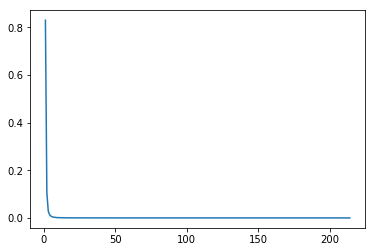

In [126]:
# ランダム抽出された名前から同姓同名の人数の相対度数分布
import math
plt.figure(0)
plt.plot(x, yp)
plt.show()

In [2]:
with open("telname_count.pickle", 'rb') as f:
    telname_count = pickle.load(f)

In [3]:
namelist = list(telname_count.keys())
countlist = list(telname_count.values())

In [14]:
# 特許発明者の名前のブロック数になるまで電話帳の名前を同姓同名の人数に比例してランダムに抽出してrnamesに抽出された数を保存する関数
import random
import copy
def random_block_sampling(k, namelist, countlist, n_limit, alpha=0.1):
    rnames = {}
    n = 0
    i = 0
    nall = 0
    stepsize = n_limit - n
    while n < n_limit and stepsize >= 1:
        i += 1
        n = len(rnames)
        stepsize = n_limit - n
        rnames0 = copy.deepcopy(rnames)
        cand = random.choices(namelist, k=int(stepsize), weights=countlist)
        for v in cand:
            if v not in rnames:
                rnames[v] = 1
            else:
                rnames[v] += 1
        if len(rnames) > n_limit:
            rnames = rnames0
            stepsize = stepsize * alpha
        else:
            nall += len(cand)
        rnames0 = {}
        n = len(rnames)
        print(k, i, stepsize, n, nall)

    sum_rnames = {}
    for k, v in rnames.items():
        if v not in sum_rnames:
            sum_rnames[v] = 1
        else:
            sum_rnames[v] += 1

    return(sum_rnames)

In [15]:
# 20回特許発明者のユニークな氏名の数だけ電話帳から氏名をランダムに抽出
import datetime
random.seed(123456789)
alpha = 0.1
n_limit = 1675133
st = datetime.datetime.today()
sum_rnames = {}
for k in range(20):
    sum_rnames[k] = random_block_sampling(k, namelist, countlist, n_limit, alpha)

ft = datetime.datetime.today()
dl = ft - st
print("time spent: ", (dl.days*24 + dl.seconds//3600), "hours", dl.seconds%3600//60, "minutes", dl.seconds%60, "seconds.")

0 1 1675133 1251703 1675133
0 2 423430 1514136 2098563
0 3 160997 1610322 2259560
0 4 64811 1648740 2324371
0 5 26393 1664215 2350764
0 6 10918 1670648 2361682
0 7 4485 1673268 2366167
0 8 1865 1674350 2368032
0 9 783 1674807 2368815
0 10 326 1675001 2369141
0 11 132 1675079 2369273
0 12 54 1675113 2369327
0 13 20 1675125 2369347
0 14 8 1675130 2369355
0 15 3 1675133 2369358
1 1 1675133 1252216 1675133
1 2 422917 1514462 2098050
1 3 160671 1610822 2258721
1 4 64311 1648900 2323032
1 5 26233 1664411 2349265
1 6 10722 1670667 2359987
1 7 4466 1673296 2364453
1 8 1837 1674336 2366290
1 9 797 1674785 2367087
1 10 348 1674997 2367435
1 11 136 1675070 2367571
1 12 63 1675109 2367634
1 13 24 1675124 2367658
1 14 9 1675128 2367667
1 15 5 1675132 2367672
1 16 1 1675132 2367673
1 17 1 1675132 2367674
1 18 1 1675133 2367675
2 1 1675133 1251868 1675133
2 2 423265 1513923 2098398
2 3 161210 1609961 2259608
2 4 65172 1648404 2324780
2 5 26729 1664223 2351509
2 6 10910 1670735 2362419
2 7 4398 167329

19 10 339 1674995 2368942
19 11 138 1675062 2369080
19 12 71 1675105 2369151
19 13 28 1675119 2369179
19 14 14 1675129 2369193
19 15 4 1675133 2369197
time spent:  0 hours 21 minutes 23 seconds.


In [16]:
with open("sum_rnames.pickle", 'wb') as f:
    pickle.dump(sum_rnames, f)

In [2]:
with open("sum_rnames.pickle", 'rb') as f:
    sum_rnames = pickle.load(f)

In [3]:
# 20回のランダム抽出結果を合計する
sum_rnames_total = {}
for m in sum_rnames.keys():
    for k in sum_rnames[m].keys():
        if k not in sum_rnames_total:
            sum_rnames_total[k] = sum_rnames[m][k]
        else:
            sum_rnames_total[k] += sum_rnames[m][k]

In [24]:
with open("sum_rnames_total.pickle", 'wb') as f:
    pickle.dump(sum_rnames_total, f)

In [ ]:
with open("sum_rnames_total.pickle", 'rb') as f:
    sum_rnames_total = pickle.load(f)

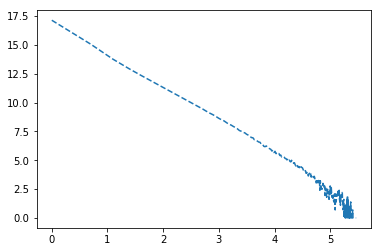

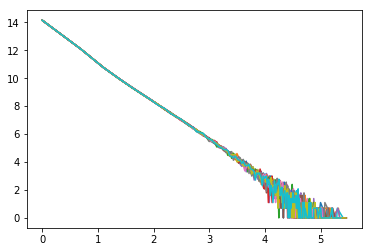

In [4]:
# 20回のランダム抽出結果とその合計を比較する
import numpy as np
import matplotlib.pyplot as plt
plt.figure(0)
x = np.array(list(sum_rnames_total.keys()))
y = np.array(list(sum_rnames_total.values()))
z = np.argsort(x)
x = x[z]
y = y[z]
plt.plot(np.log(x), np.log(y), linestyle="--")
plt.show()

plt.figure(0)
for k in sum_rnames.keys():
    x = np.array(list(sum_rnames[k].keys()))
    y = np.array(list(sum_rnames[k].values()))
    z = np.argsort(x)
    x = x[z]
    y = y[z]
    plt.plot(np.log(x), np.log(y))
plt.show()

In [5]:
x = np.array(list(sum_rnames_total.keys()))
y = np.array(list(sum_rnames_total.values()))
z = np.argsort(x)
x = x[z]
y = y[z]
xy = x * y

In [8]:
print(x)
print(y)
print(xy)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 207 208 209 210 211 212 213 214 217 218 219 222
 223 224 227 229 231 233 235 236]
[27781824  3545995   948294   416830   227947   141106    94628    66330
    48619    3665

In [10]:
import random
import math

random.seed(123456789)
rblock_size = random.choices(x, k=20000, weights=y)

rcluster_block = []
b = 0
nconbi = 0
for bs in rblock_size:
    b += 1
    np = 5 * bs
    nconbi += math.factorial(np)//(math.factorial(np-2)*math.factorial(2))
    for i in range(bs):
        rcluster_block.append(b)

In [22]:
len(rcluster_block)

28273

In [23]:
nconbi

1511630